# <span style="color:blue">Tutorial: Simulating gamma-ray transport in the atmosphere with the cosi-atmosphere package <br /></span>

### Import the COSI atmosphere package

In [1]:
from cosi_atmosphere.response.AtmosphericProfile import Atmosphere
from cosi_atmosphere.response.MassModels import MakeMassModels
from cosi_atmosphere.response.RunSims import Simulate
from cosi_atmosphere.response.ProcessSims import Process
import numpy as np
import os

## <span style="color:blue">Make the Mass Model</span>
### The first step is to make an atmospheric model using the Atmoshpere class.
### This provides an altitude density profile for the different components of the atmosphere. 
### For the atmospheric model you need to specify the date, latitude, and longitude, as well as the atmosphospheric spacing.
### Here we will use a spacing of 100 m.  

In [2]:
instance = Atmosphere()
date = np.array(['2016-06-13 12:00:00'], dtype="datetime64[h]")
lat = -5.66
lon = -107.38
alts = np.linspace(0, 200, 2001) # km; spacing is 0.1 km (100 m) 
atm_model = instance.get_atm_profile("rep_atm_model.dat",date,lon,lat,alts)

### Let's take a look at the first 5 lines of the output file to see what it contains:

In [3]:
os.system("head -n 5 rep_atm_model.dat")

altitude[km]	mass_density[kg/m3]	N2[m-3]	O2[m-3]	O[m-3]	He[m-3]	H[m-3]	Ar[m-3]	N[m-3]	anomalous_oxygen[m-3]	NO[m-3]	Temperature[k]
0.000000e+00	1.176653e+00	1.911429e+25	5.125639e+24	0.000000e+00	1.272904e+20	0.000000e+00	2.284374e+23	0.000000e+00	0.000000e+00	0.000000e+00	2.966827e+02
1.000000e-01	1.164742e+00	1.892081e+25	5.073756e+24	0.000000e+00	1.260020e+20	0.000000e+00	2.261251e+23	0.000000e+00	0.000000e+00	0.000000e+00	2.962918e+02
2.000000e-01	1.152961e+00	1.872944e+25	5.022437e+24	0.000000e+00	1.247275e+20	0.000000e+00	2.238379e+23	0.000000e+00	0.000000e+00	0.000000e+00	2.958947e+02
3.000000e-01	1.141304e+00	1.854006e+25	4.971656e+24	0.000000e+00	1.234664e+20	0.000000e+00	2.215747e+23	0.000000e+00	0.000000e+00	0.000000e+00	2.954918e+02


0

### Next we need to make a mass model of the atmosphere. 
### This is done with the MakeMassModels class, which takes as input the atmospheric model calculated in the previous step.
### Let's first define an instance of the class and plot the atmospheric profile:

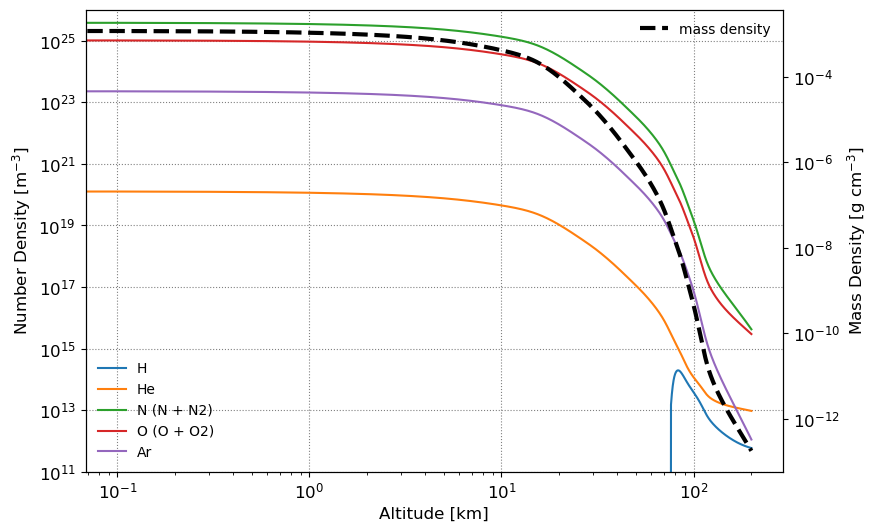

In [4]:
instance = MakeMassModels("rep_atm_model.dat")
instance.plot_atmosphere()

### The left axis in the above plot shows the number density of the different atmospheric elements.
### The right axis shows the total mass density of all elements.<br />
### Now let's define our mass model. 
### Two options are available for this: rectangular and spherical.
### Note: the tools needed for processing the spherical model are not quite ready yet, but will be available soon.
### The simulations use a watched volume to detect all passing photons, and so we need to pass the altitude to use. 
### Here we will use a rectangular geometry with a watched volume at 33 km.

In [5]:
instance.rectangular_model(33)

Using half-height [cm]: 5000.0
Watch index: 330


### The output is written to atmosphere.geo
### Let's take a look at the first 40 lines:

In [6]:
os.system("head -n 40 atmosphere.geo")

# Atmosphere model

Name AtmoshpereModel

# Surrounding sphere:
SurroundingSphere 0.1 0 0 20000000.0 0.1

Volume World
World.Material Vacuum
World.Shape BOX 10240000000.000000 10240000000.000000 10240000000.000000
World.Visibility 1
World.Position 0 0 0
World.Mother 0

Include $(MEGALIB)/resource/examples/geomega/materials/Materials.geo

Material MaterialSlice_0_1
MaterialSlice_0_1.Density 0.001176653
MaterialSlice_0_1.ComponentByAtoms He 2
MaterialSlice_0_1.ComponentByAtoms N 784845
MaterialSlice_0_1.ComponentByAtoms O 210462
MaterialSlice_0_1.ComponentByAtoms Ar 4689

Volume VolumeSlice_0_1
VolumeSlice_0_1.Material MaterialSlice_0_1
VolumeSlice_0_1.Shape BOX 51200000.000000 51200000.000000 5000.0
VolumeSlice_0_1.Visibility  1
VolumeSlice_0_1.Position 0 0 5000.0
VolumeSlice_0_1.Mother World

Material MaterialSlice_1_2
MaterialSlice_1_2.Density 0.0011647419999999999
MaterialSlice_1_2.ComponentByAtoms He 2
MaterialSlice_1_2.ComponentByAtoms N 784845
MaterialSlice_1_2.ComponentByAtoms O 

0

### You can see that each volume slice is a large rectangular slab with a half-width of 5000 cm.
### The material of each volume slice corresponds to the atmospheric profile.</br>

### Now let's take a look at the last 20 lines of the geometry file:

In [7]:
os.system("tail -n 20 atmosphere.geo")

MaterialSlice_1999_2000.Density 1.783777e-13
MaterialSlice_1999_2000.ComponentByAtoms H 81
MaterialSlice_1999_2000.ComponentByAtoms He 1311
MaterialSlice_1999_2000.ComponentByAtoms N 587675
MaterialSlice_1999_2000.ComponentByAtoms O 410776
MaterialSlice_1999_2000.ComponentByAtoms Ar 155

Volume VolumeSlice_1999_2000
VolumeSlice_1999_2000.Material MaterialSlice_1999_2000
VolumeSlice_1999_2000.Shape BOX 51200000.000000 51200000.000000 5000.0
VolumeSlice_1999_2000.Visibility  1
VolumeSlice_1999_2000.Position 0 0 19995000.0
VolumeSlice_1999_2000.Mother World

Volume TestVolume
TestVolume.Material MaterialSlice_330_331
TestVolume.Shape BOX 51200000.000000 51200000.000000 5000.0
TestVolume.Visibility 1
TestVolume.Position 0 0 0
TestVolume.Mother VolumeSlice_330_331


0

### The last block here is our watched volume (called TestVolume).
### Here we are watching VolumeSlice_330_331, which corresponds to the rectangular slab at an altitude of 33 km. 
### In principle, we can let the watched volume be whatever we want. 
### For example, to use a sphere with a radius of 100 cm within the same volume slice, you would replace the shape with: TestVolume.Shape Sphere 0 100. 
### This option is not yet hard coded, so if a different watched volume is needed, you will have to do it by hand for now.</br>

## <span style="color:blue">Make the Source File</span>
### The other thing we need for the simulations is the source file. 
### For the rectangular geometry we use a narrow beam, and an example file is provided: AtmospherePencilBeam.source
### Let's take a look:

In [8]:
os.system("cat AtmospherePencilBeam.source")

# An atmosphere simulation

Version         1
Geometry        atmosphere.geo

# Physics list
PhysicsListEM                        LivermorePol
PhysicsListEMActivateFluorescence    false

# Output formats
StoreCalibrated                      true
StoreSimulationInfo                  init-only
StoreSimulationInfoIonization        false
StoreSimulationInfoWatchedVolumes    TestVolume
StoreOnlyTriggeredEvents             false
DiscretizeHits                       true

DefaultRangeCut 100

Run SpaceSim
SpaceSim.FileName         Atmosphere_PencilBeam
SpaceSim.Triggers         10000

SpaceSim.Source Beam
Beam.ParticleType           1
Beam.Beam                   HomogeneousBeam 0 0 20000000   0 0 -1  1
Beam.Spectrum               Linear 10 10000
Beam.Flux                   1.0



0

### For demonstration purposes we are only simulating 10000 triggers. In practice, ~ 1 million - 5 million should provide sufficient statistics. 
### We have a homogeneous narrow beam (r = 1cm) placed on axis at the top of the atmosphere (200 km), which throws photons straight down.
### The spectrum is linear between 10 - 10000 keV. </br>

### The inputs for HomogeneousBeam are: x y z nx ny nz r
### We can place the beam off-axis by changing x, nx, and nz. 
### For example, suppose we want to do 50 degrees off axis with a watched altitude of 33 km.
### We can determine what values we need to use by running the following:

In [9]:
angle = 50.0 # degrees
altitude = 33.0 # km
instance.get_cart_vectors(angle, altitude)


x [cm]: 19902284.996323306
nx [cm]: -0.766044443118978
nz [cm]: -0.6427876096865394



### Replacing the corresponding inputs in the source file with these values will produce an off-axis source. </br>

## <span style="color:blue">Run the Simulations</span>
### Once we have the mass model and the source file, we can run the simulations. 
### Let's define an instance of the Simulation class and make a short run:

In [9]:
instance = Simulate()
instance.run_sim("AtmospherePencilBeam.source", seed=3000, verbosity=0)


**************************************************************************
*                                                                        *
*                Cosima - the cosmic simulator of MEGAlib                *
*                                                                        *
*             This program is part of MEGAlib version 3.99.01            *
*                (C) by Andreas Zoglauer and contributors                *
*                                                                        *
*                      Master reference for MEGAlib:                     *
*            A. Zoglauer et al., NewAR 50 (7-8), 629-632, 2006           *
*                                                                        *
*            For more information about MEGAlib please visit:            *
*                        http://megalibtoolkit.com                       *
*                                                                        *
************************

### The above command is a python wrapper for cosima, and it will produce the .sim file.  
### Now let's parse the sim file. This will produce two .dat files: one with information for all thrown photons and another with information for all detected photons.

In [10]:
instance.parse_sim_file("Atmosphere_PencilBeam.inc1.id1.sim")

### Let's take a look at the output format:

In [11]:
os.system("head -n 5 all_thrown_events.dat")

id	ei[keV]	xi[cm]	yi[cm]	zi[cm]	xdi[cm]	ydi[cm]	zdi[cm]
1	6.041339000e+03	7.339900000e-01	1.017700000e-01	2.000000000e+07	0.000000000e+00	0.000000000e+00	-1.000000000e+00
2	7.831685000e+03	6.970800000e-01	-4.249200000e-01	2.000000000e+07	0.000000000e+00	0.000000000e+00	-1.000000000e+00
3	3.470339000e+03	-1.828400000e-01	-2.275600000e-01	2.000000000e+07	0.000000000e+00	0.000000000e+00	-1.000000000e+00
4	6.729603000e+03	3.257600000e-01	7.572800000e-01	2.000000000e+07	0.000000000e+00	0.000000000e+00	-1.000000000e+00


0

In [12]:
os.system("head -n 5 event_list.dat")

id	em[keV]	xm[cm]	ym[cm]	zm[cm]	xdm[cm]	ydm[cm]	zdm[cm]
1	6.041339000e+03	7.339900000e-01	1.017700000e-01	3.310000000e+06	0.000000000e+00	0.000000000e+00	-1.000000000e+00
2	7.831685000e+03	6.970800000e-01	-4.249200000e-01	3.310000000e+06	0.000000000e+00	0.000000000e+00	-1.000000000e+00
3	3.470339000e+03	-1.828400000e-01	-2.275600000e-01	3.310000000e+06	0.000000000e+00	0.000000000e+00	-1.000000000e+00
4	6.729603000e+03	3.257600000e-01	7.572800000e-01	3.310000000e+06	0.000000000e+00	0.000000000e+00	-1.000000000e+00


0

### Note that the first file has all the initial information, and the second file has all the measured information. </br>

## <span style="color:blue">Process the Simulations</span>
### Now we can process the simulations using the Process class. 
### When defining an instance of the Process class we need to specify the type of geometry and off-axis angle of the source.
### As a simple example, let's bin the data and make some diagnostic plots:

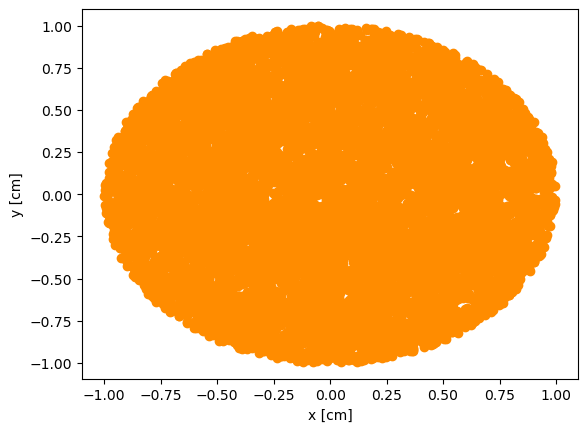

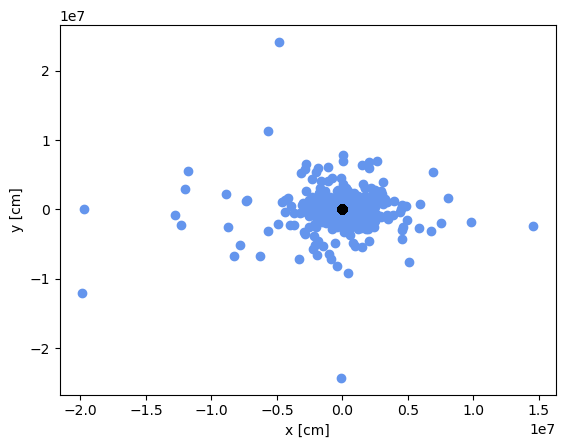

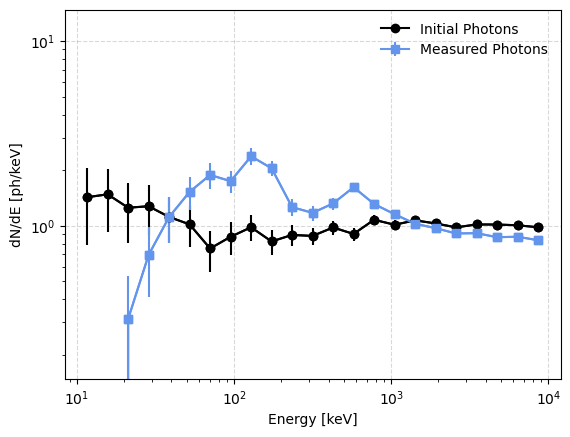


Number of starting photons: 10000.0
Number of measured photons: 9407.0



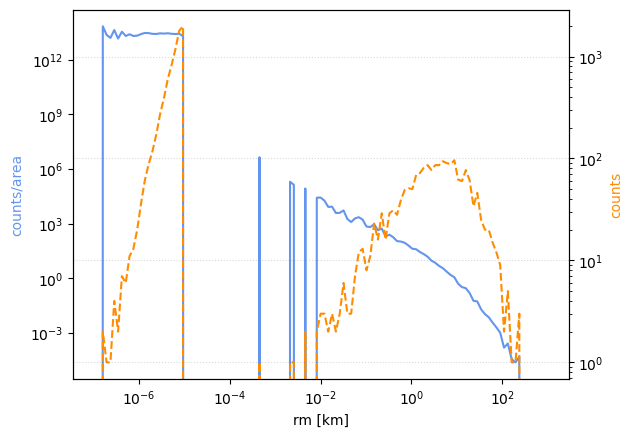

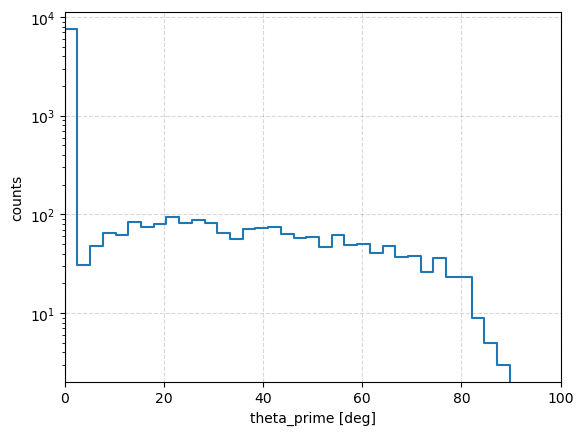

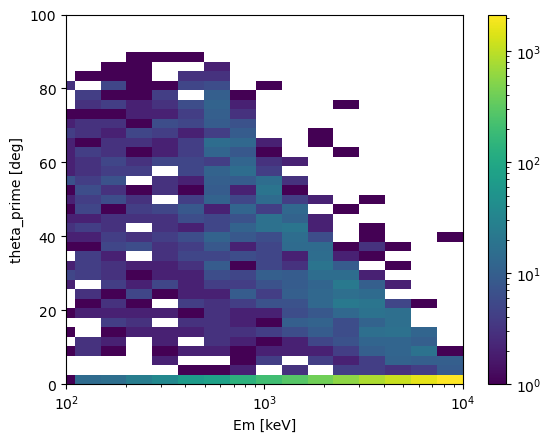

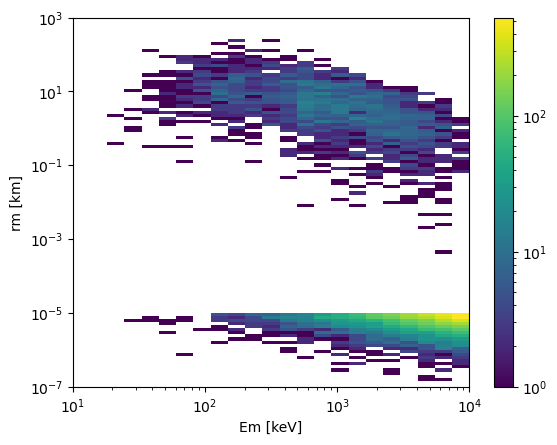

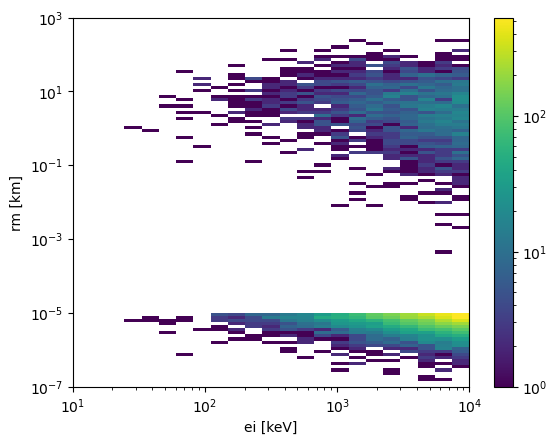

In [13]:
instance = Process("rectangular",0)
instance.bin_sim()
instance.make_scattering_plots()

### The statistics are not great since we only ran 10000 triggers, but this gives an idea of the output. 
### summary of output plots:
### plot 1: x y positions of starting photons 
### plot 2: x y positions of measured photons: blue = scatterd, black = un-scattered
### plot 3: spectrum of initial and measured photons
### plot 4: distribution of counts versus the radius from the center of the beam (rm)
### plot 5: distribution of counts versus the photon's incident angle (theta_prime)
### plot 6: projection of counts onto incident angle and measured energy (Em) axes
### plot 7: projection of counts onto rm and Em axes
### plot 8: projection of counts onto rm and initial energy (Ei) axes